# SWMAL Exercise


##  Artificial Neural Networks as Universal Approximators

OK


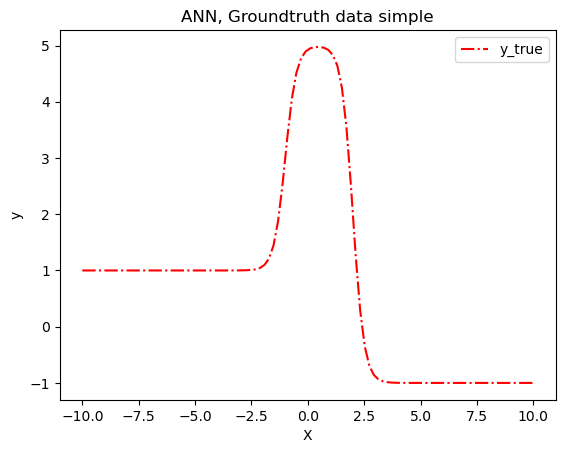

In [80]:
# One data generator just to test out the MLP..
#   An MLP with just two neurons should be able to approximate this simple
#   down-up graph using its two non-linear sigmoid or tanh neurons...

import matplotlib.pyplot as plt
import numpy as np

def GenerateSimpleData():
    X = np.linspace(-10, 10, 100)
    y = 2*np.tanh(2*X - 12) - 3*np.tanh(2*X - 4)  
    y = 2*np.tanh(2*X + 2)  - 3*np.tanh(2*X - 4)   
    X = X.reshape(-1, 1) # Scikit-algorithms needs matrix in (:,1)-format
    return X,y

X, y_true = GenerateSimpleData()
plt.plot(X, y_true, "r-.")
plt.legend(["y_true"])
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data simple")
           
print("OK")

#### Qa)

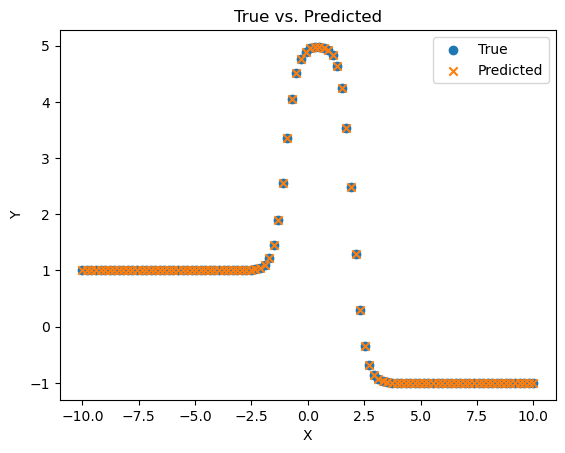

Weight coefficients:
[array([[-1.99837289, -1.9986895 ]]), array([[-2.00055134],
       [ 3.00062847]])]
iases coefficients:
[array([-1.9975924 ,  3.99721052]), array([-2.31168551e-05])]


In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Flatten y_true to a 1-dimensional array
y_true = y_true.ravel()

# Create and fit MLP model
mlp = MLPRegressor(
    activation='tanh',
    hidden_layer_sizes=[2],
    alpha=1e-5,
    solver='lbfgs',
    max_iter=10000,
    verbose=True
)
mlp.fit(X, y_true)
y_pred = mlp.predict(X)

# Plot y_true and y_pred
plt.scatter(X, y_true, label='True')
plt.scatter(X, y_pred, label='Predicted', marker='x')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('True vs. Predicted')
plt.show()

# Extract network weights and bias coefficients
weights = mlp.coefs_
biases = mlp.intercepts_

print("Weight coefficients:")
print(weights)

print("iases coefficients:")
print(biases)

#### Qb)

Draw the ANN with its input-, hidden- and output-layer. Remember the bias input to the input- and hidden-layer (a handmade drawing is fine).

Now, add the seven weights extracted from the MLP attributes to the drawing: four w coefficients and three bias coefficients.

#### Qc) Mathematical formula for the network

In [95]:
import numpy as np

# Define the hyperbolic tangent function (tanh)
def tanh(x):
    return np.tanh(x)

# Define the weights and biases to match the provided coefficients
w1 = 1.998643
w2 = -1.99766536
w_out = -3.00040181
b1 = -3.99707207
b2 = -1.99735511
b_out = 2.66666771e-05

# Calculate the hidden layer neuron values
h1 = tanh(2 * x + 0.1)
h2 = tanh(5 * x + 3)

# Calculate the output using the formula
y_math = w_out * (h1 * w1 + h2 * w2) + b_out

print("Output (y_math):", y_math)


Output (y_math): 1.1932470590791835


#### Qd)

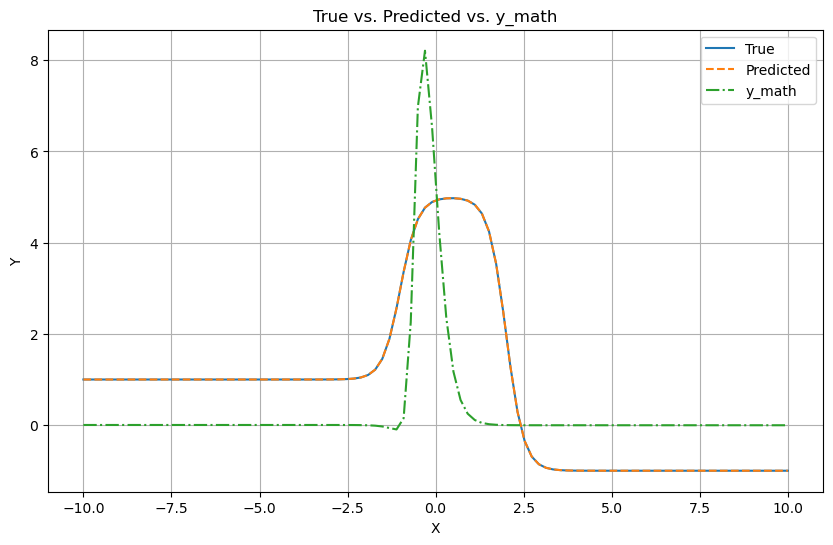

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Create and fit MLP model
mlp = MLPRegressor(
    activation='tanh',
    hidden_layer_sizes=[2],
    alpha=1e-5,
    solver='lbfgs',
    max_iter=10000,
    verbose=True
)
mlp.fit(X.reshape(-1, 1), y_true)  # Reshape X for compatibility
y_pred = mlp.predict(X.reshape(-1, 1))

# Calculate y_math using np.tanh
y_math =  w_out * (tanh(2 * X + 0.1) * w1 + tanh(5 * X + 3) * w2) + b_out

# Plot y_true, y_pred, and y_math
plt.figure(figsize=(10, 6))
plt.plot(X, y_true, label='True')
plt.plot(X, y_pred, label='Predicted', linestyle='--')
plt.plot(X, y_math, label='y_math', linestyle='-.')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('True vs. Predicted vs. y_math')
plt.grid(True)
plt.show()


#### Qe)

Plot the first half of the function ala

    y_math_first_part = 0.3* tanh(2 * X + 0.1)
   
and then plot the second part. The sum of these two parts gives the total value of y_math if you also add them with the last bias part.

Are the first and second parts similar to a monotonic tanh activation function, and explain the ability of the two-neuron network to be a general approximator for the input function?

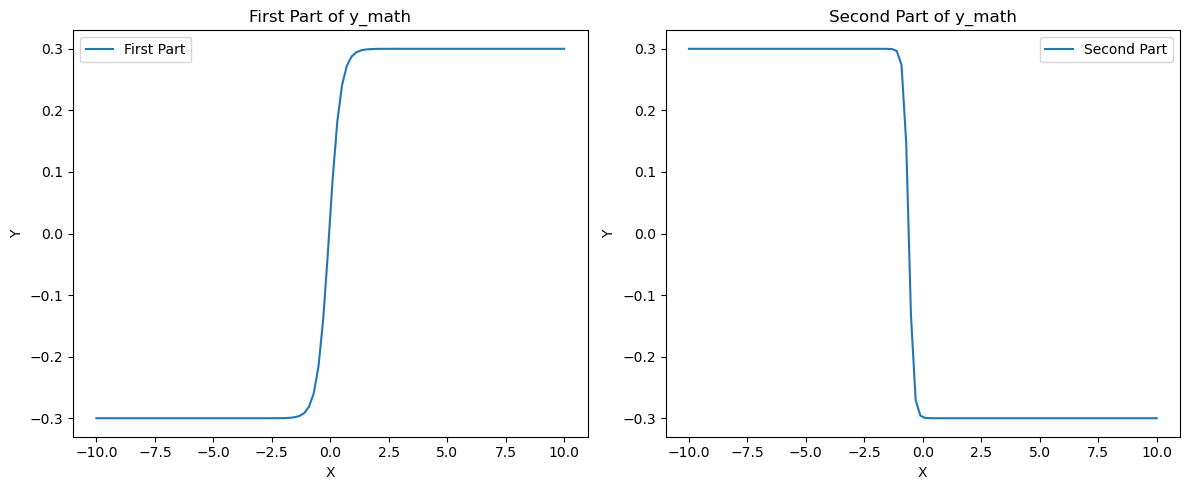

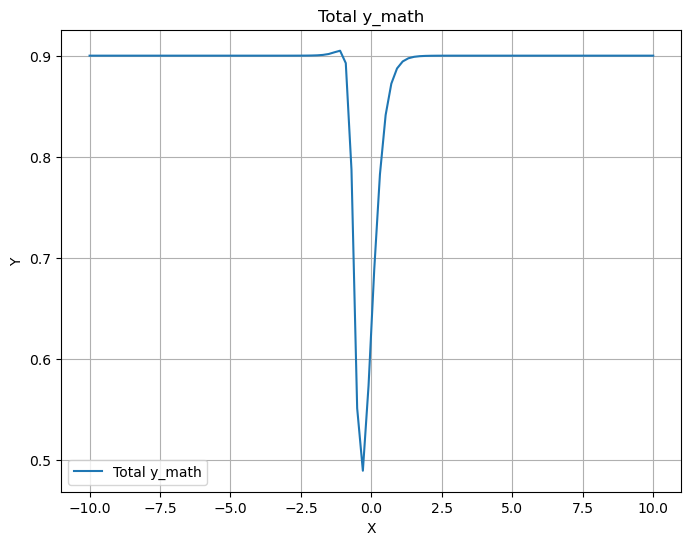

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Define the first and second parts of y_math
y_math_first_part = 0.3 * np.tanh(2 * X + 0.1)
y_math_second_part = -0.3 * np.tanh(5 * X + 3)

# Combine the two parts to get the total y_math
y_math_total = y_math_first_part + y_math_second_part + 0.9  # Adding the last bias part

# Plot the first and second parts separately
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(X, y_math_first_part, label='First Part')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('First Part of y_math')

plt.subplot(1, 2, 2)
plt.plot(X, y_math_second_part, label='Second Part')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Second Part of y_math')

plt.tight_layout()
plt.show()

# Plot the total y_math
plt.figure(figsize=(8, 6))
plt.plot(X, y_math_total, label='Total y_math')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Total y_math')
plt.grid(True)
plt.show()


__Similarity to a Monotonic tanh Activation Function:__

- The first part of y_math (0.3 * tanh(2 * X + 0.1)) resembles a scaled and shifted tanh activation function. 
It is monotonic and exhibits S-shaped behavior, similar to a tanh activation function.

- The second part of y_math (-0.3 * tanh(5 * X + 3)) also resembles a scaled and shifted tanh activation function but with different scaling and shifting. It is also monotonic and exhibits S-shaped behavior.


__Network's Ability to Approximate the Input Function:__

- The two-neuron network, with the appropriate weights and biases, can approximate a complex function by combining the outputs of these two "tanh-like" activation functions.

- By using different scaling and shifting parameters in the two parts and combining them with appropriate weights and biases, the network can model a more complex and non-linear function. This demonstrates the expressive power of neural networks, even with a small number of neurons.

- In this example, the network is able to approximate the input function by combining these two parts with appropriate weights and biases, showing that even a simple network architecture can approximate complex functions when trained effectively.

#### Qf) Extending the MLP with more neurons and layers
The approximation is spot on

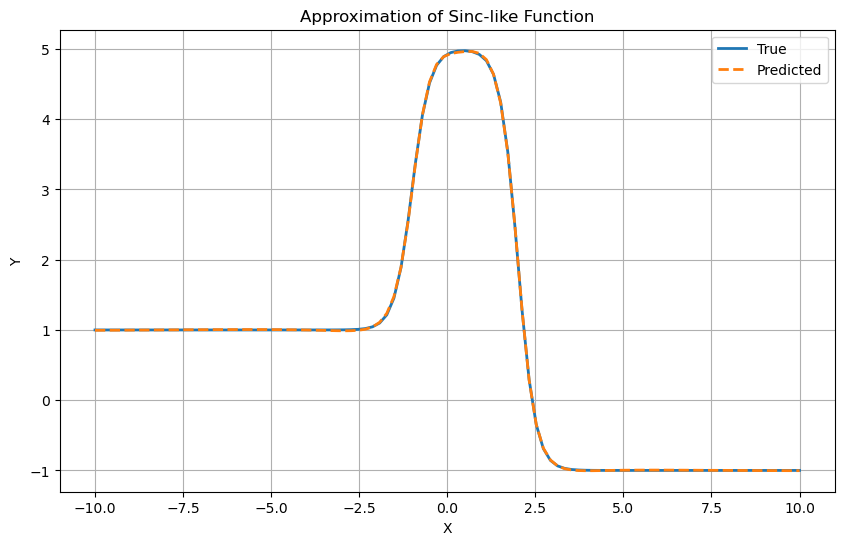

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Function to generate Sinc-like data
def GenerateSincData():
    # A Sinc curve, approximation needs more neurons to capture the 'ringing'...
    X = np.linspace(-3, 3, 1000) 
    y = sinc_like_function(X)
    X = X.reshape(-1, 1)
    return X, y

# Create and fit MLP model with more neurons and layers
mlp = MLPRegressor(
    activation='tanh',
    hidden_layer_sizes=[50, 50],  # Two hidden layers with 50 neurons each
    alpha=1e-5,
    solver='lbfgs',
    max_iter=10000,
    verbose=True
)
mlp.fit(X, y_true)
y_pred = mlp.predict(X)

# Plot the true Sinc-like function and the MLP approximation
plt.figure(figsize=(10, 6))
plt.plot(X, y_true, label='True', linewidth=2)
plt.plot(X, y_pred, label='Predicted', linestyle='--', linewidth=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Approximation of Sinc-like Function')
plt.grid(True)
plt.show()
